In [72]:
import pandas as pd
import numpy as np
import seaborn as sns

In [73]:
df = pd.read_csv("data/merged_and_edited_dataset.csv",
                    dtype={
                        "src_ip": "string",
                        "dst_ip": "string",
                        "client_fingerprint": "string",
                        "application_name": "string",
                        "application_category_name": "string",
                        "requested_server_name": "string",
                        "atk_type": "string",
                        "traffic_type": "string"
                    }).drop([
                        "Unnamed: 0",
                        "server_fingerprint",
                        "user_agent",
                        "content_type"
                    ], axis=1)

In [74]:
df.dtypes.to_dict()

{'id': dtype('int64'),
 'expiration_id': dtype('int64'),
 'src_ip': string[python],
 'src_ip_is_private': dtype('int64'),
 'src_port': dtype('int64'),
 'dst_ip': string[python],
 'dst_ip_is_private': dtype('int64'),
 'dst_port': dtype('int64'),
 'protocol': dtype('int64'),
 'ip_version': dtype('int64'),
 'vlan_id': dtype('int64'),
 'bidirectional_first_seen_ms': dtype('int64'),
 'bidirectional_last_seen_ms': dtype('int64'),
 'bidirectional_duration_ms': dtype('int64'),
 'bidirectional_packets': dtype('int64'),
 'bidirectional_bytes': dtype('int64'),
 'src2dst_first_seen_ms': dtype('int64'),
 'src2dst_last_seen_ms': dtype('int64'),
 'src2dst_duration_ms': dtype('int64'),
 'src2dst_packets': dtype('int64'),
 'src2dst_bytes': dtype('int64'),
 'dst2src_first_seen_ms': dtype('int64'),
 'dst2src_last_seen_ms': dtype('int64'),
 'dst2src_duration_ms': dtype('int64'),
 'dst2src_packets': dtype('int64'),
 'dst2src_bytes': dtype('int64'),
 'bidirectional_min_ps': dtype('int64'),
 'bidirectional_m

In [75]:
df.head()

,id,expiration_id,src_ip,src_ip_is_private,src_port,dst_ip,dst_ip_is_private,dst_port,protocol,ip_version,...,splt_direction,splt_ps,splt_piat_ms,application_name,application_category_name,application_is_guessed,requested_server_name,client_fingerprint,atk_type,traffic_type
0,0,1,192.168.0.11,1,5555,192.168.0.26,1,54128,6,4,...,"[0, 1, 0, 1, 0, 1, 0, 1, 0, 0]","[1500, 64, 1500, 64, 1500, 64, 1500, 64, 1500,...","[0, 6, 0, 9, 0, 1, 0, 4, 0, 0]",Unknown,Unspecified,0,<NA>,<NA>,mitm,attack
1,1,0,fe80::54a9:5636:2a26:d2f9,1,5353,ff02::fb,0,5353,17,6,...,"[0, 0, 0, 0, -1, -1, -1, -1, -1, -1]","[216, 216, 216, 608, -1, -1, -1, -1, -1, -1]","[0, 251, 250, 252, -1, -1, -1, -1, -1, -1]",MDNS,Network,1,<NA>,<NA>,mitm,attack
2,2,0,192.168.0.11,1,5353,224.0.0.251,0,5353,17,4,...,"[0, 0, 0, 0, -1, -1, -1, -1, -1, -1]","[236, 236, 236, 628, -1, -1, -1, -1, -1, -1]","[0, 251, 250, 251, -1, -1, -1, -1, -1, -1]",MDNS,Network,1,<NA>,<NA>,mitm,attack
3,3,0,fe80::9653:30ff:fedf:da27,1,0,ff02::1,0,0,58,6,...,"[0, -1, -1, -1, -1, -1, -1, -1, -1, -1]","[80, -1, -1, -1, -1, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1, -1, -1, -1, -1]",ICMPV6,Network,0,<NA>,<NA>,mitm,attack
4,4,0,2606:a000:8bc0:c100:c5a4:7264:d03e:fdb1,0,42994,2607:f8b0:4002:c02::5f,0,443,6,6,...,"[0, -1, -1, -1, -1, -1, -1, -1, -1, -1]","[55, -1, -1, -1, -1, -1, -1, -1, -1, -1]","[0, -1, -1, -1, -1, -1, -1, -1, -1, -1]",TLS,Web,1,<NA>,<NA>,mitm,attack


In [76]:
df.columns

Index(['id', 'expiration_id', 'src_ip', 'src_ip_is_private', 'src_port',
       'dst_ip', 'dst_ip_is_private', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'bidirectional_first_seen_ms', 'bidirectional_last_seen_ms',
       'bidirectional_duration_ms', 'bidirectional_packets',
       'bidirectional_bytes', 'src2dst_first_seen_ms', 'src2dst_last_seen_ms',
       'src2dst_duration_ms', 'src2dst_packets', 'src2dst_bytes',
       'dst2src_first_seen_ms', 'dst2src_last_seen_ms', 'dst2src_duration_ms',
       'dst2src_packets', 'dst2src_bytes', 'bidirectional_min_ps',
       'bidirectional_mean_ps', 'bidirectional_stddev_ps',
       'bidirectional_max_ps', 'src2dst_min_ps', 'src2dst_mean_ps',
       'src2dst_stddev_ps', 'src2dst_max_ps', 'dst2src_min_ps',
       'dst2src_mean_ps', 'dst2src_stddev_ps', 'dst2src_max_ps',
       'bidirectional_min_piat_ms', 'bidirectional_mean_piat_ms',
       'bidirectional_stddev_piat_ms', 'bidirectional_max_piat_ms',
       'src2dst_min_piat_ms', 

In [77]:
df["expiration_id"] = df["expiration_id"].map({0: "idle_timeout", 1: "active_timeout", -1: "custom"})

<AxesSubplot:title={'center':'Behavior Type'}>

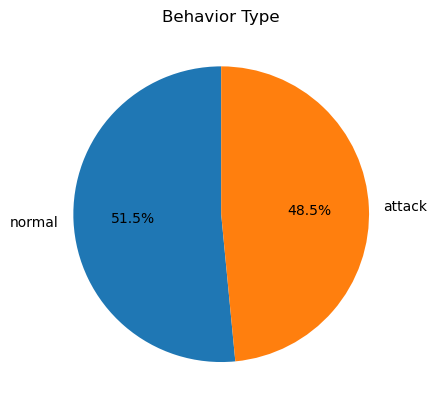

In [78]:
df["traffic_type"].value_counts().plot(kind="pie", ylabel="", title="Behavior Type", autopct='%1.1f%%', startangle=90)

<AxesSubplot:title={'center':'Behavior Type'}>

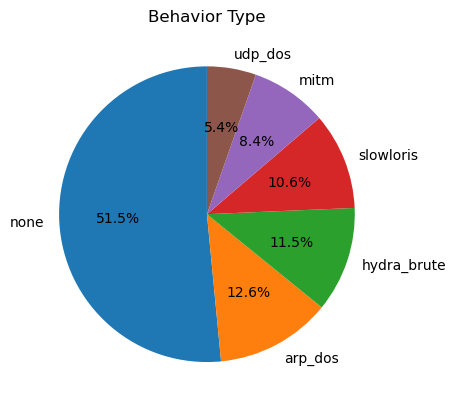

In [79]:
attack = df["atk_type"].value_counts()
attack.plot(kind="pie", ylabel="", title="Behavior Type", autopct='%1.1f%%', startangle=90)

<AxesSubplot:title={'center':'Expiration ID'}>

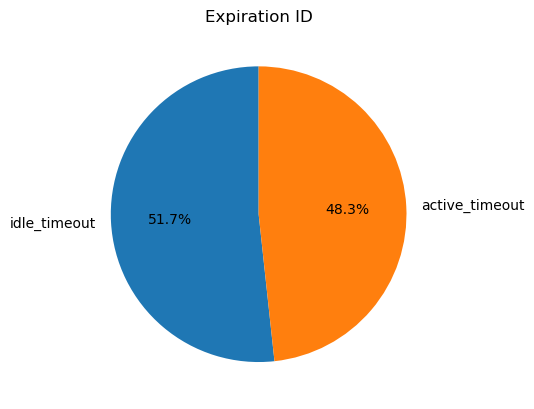

In [80]:
df["expiration_id"].value_counts().plot(kind="pie", ylabel="", title="Expiration ID", autopct='%1.1f%%', startangle=90)

<AxesSubplot:title={'center':'Source Ports'}, ylabel='Frequency'>

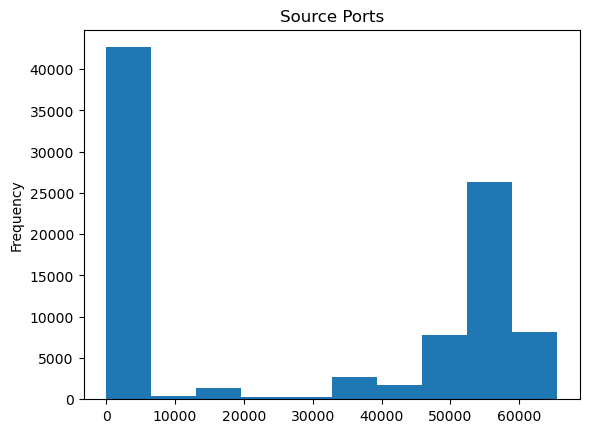

In [81]:
df["src_port"].plot(kind="hist", title="Source Ports")

<AxesSubplot:title={'center':'Destination Ports'}, ylabel='Frequency'>

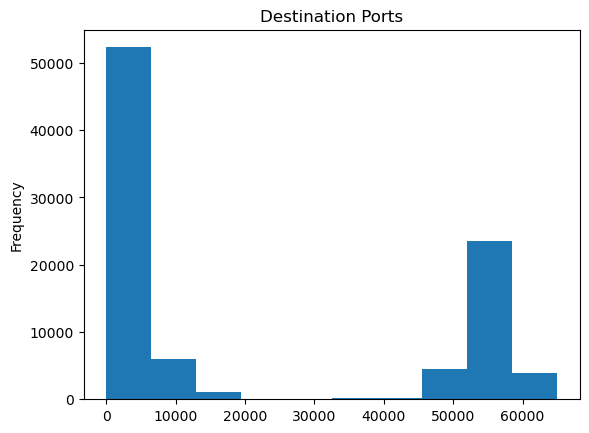

In [82]:
df["dst_port"].plot(kind="hist", title="Destination Ports")

<AxesSubplot:title={'center':'Destination Ports'}, ylabel='Frequency'>

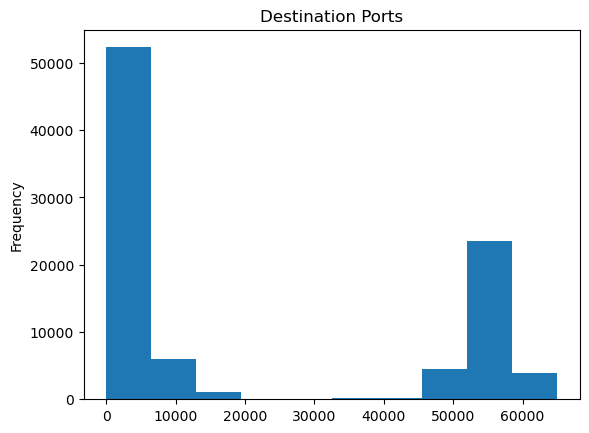

In [83]:
df["dst_port"].plot(kind="hist", title="Destination Ports")

<AxesSubplot:title={'center':'IP Version'}>

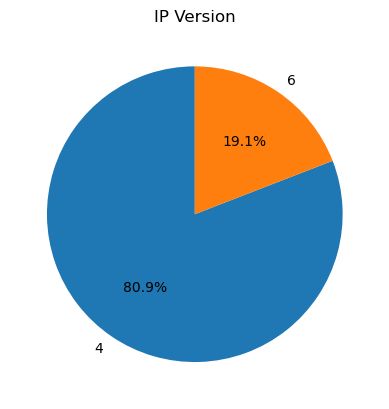

In [84]:
df["ip_version"].value_counts().plot(kind="pie", ylabel="", title="IP Version", autopct='%1.1f%%', startangle=90)

<AxesSubplot:title={'center':'Bidirectional Packets'}, ylabel='Frequency'>

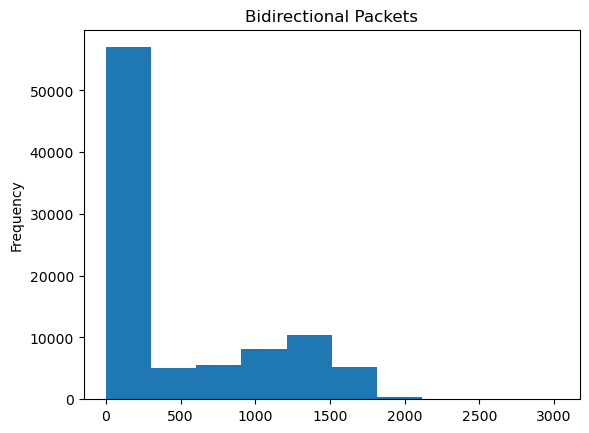

In [85]:
df["bidirectional_packets"].plot(kind="hist", title="Bidirectional Packets")

<AxesSubplot:title={'center':'Bidirectional Bytes'}, ylabel='Frequency'>

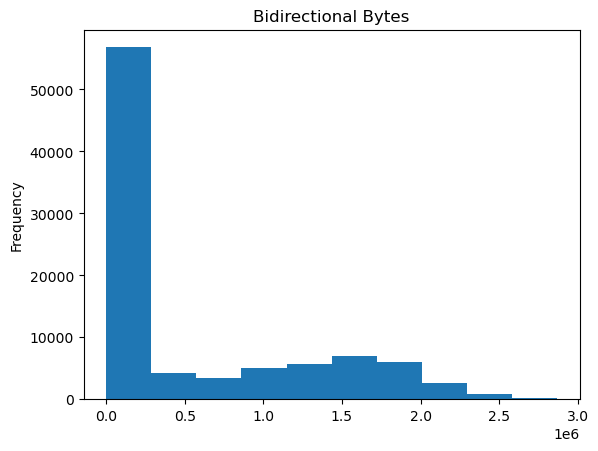

In [86]:
df["bidirectional_bytes"].plot(kind="hist", title="Bidirectional Bytes")